# Analisis de comportamienos de las simulaciones en omnet++
La idea es graficar los valores de medicion que permitan entender el problema de nuestra simulacion.
Tenemos un emisor, una red , y un receptor/consumidor.
Podemos querer medir ditinta cosas en nuestro sistema ara tratar de entender los problemas.

Ejemplos:
1. Delay de los paquetes entre que se generan y son procesados.
2. Cantidad de paquetes generados
3. cantidad de paquetes recibidos
4. Cantidad e paquetes en buffer (del emisor, la cola y el receptor)
5. Paquetes dropeados (en la cola, en el receptor)

Esto omnet nos permite analizarlos luego, pero tiene algunas limitaciones en cruces que se pueden hacer, modos de visualizacion, etc.
Por lo que podemos exportar esos datos a un archivo csv y manipularlos con herramientas como esta. Notbooks, Python, pandas y matplotlib.


# Matplotlib

Matplotlib es probablemente el paquete de Python más utilizado para gráficos 2D. Proporciona una manera muy rápida de visualizar datos y figuras con calidad de publicación en varios formatos. 

In [18]:
#Configuracion inicial
%matplotlib inline
import matplotlib.pyplot as plt #librería para graficas de python
import numpy # extiende las librerias de matemática de python
import pandas #libreria para procesamiento de datos muy usada en la industria
import seaborn # Extiende las funcionalidades de matplotlib, muy usado en data visualization

# Con esto hacemos los gráficos más grandes, adecuados para el proyector.
seaborn.set_context(context='notebook', font_scale=1.2)


In [20]:
## Cambiar la dirección del conjunto de datos de acuerdo a dónde lo guardaron
data = pandas.read_csv("Parte2_caso2/data_0.1.csv")
data

,PacketDropQueue Network.nodeTx.TrTx (#0 - General-0-20230516-07:13:25-15547),Unnamed: 1,PacketDropQueue Network.queue_0 (#0 - General-0-20230516-07:13:25-15547),Unnamed: 3,PacketDropQueue Network.queue_1 (#0 - General-0-20230516-07:13:25-15547),Unnamed: 5,PacketDropQueue Network.nodeRx.TrRx (#0 - General-0-20230516-07:13:25-15547),Unnamed: 7,PacketGen Network.nodeTx.gen (#0 - General-0-20230516-07:13:25-15547),Unnamed: 9,...,BufferSizeQueue Network.queue_0 (#0 - General-0-20230516-07:13:25-15547),Unnamed: 13,BufferSizeQueue Network.nodeRx.TrRx (#0 - General-0-20230516-07:13:25-15547),Unnamed: 15,Delay Network.nodeRx.sink (#0 - General-0-20230516-07:13:25-15547),Unnamed: 17,PacketUsed Network.nodeRx.sink (#0 - General-0-20230516-07:13:25-15547),Unnamed: 19,BufferSizeQueue Network.queue_1 (#0 - General-0-20230516-07:13:25-15547),Unnamed: 21
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.079587,1,...,0.179687,1.0,0.379787,1.0,0.479787,0.400200,0.479787,1.0,34.380527,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169443,2,...,0.279687,1.0,0.579787,1.0,0.679787,0.510344,0.679787,1.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.295037,3,...,0.395137,1.0,0.779787,1.0,0.879787,0.584751,0.879787,1.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.480997,4,...,0.581097,1.0,0.979787,1.0,1.079787,0.598790,1.079787,1.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.573319,5,...,0.681097,2.0,1.179787,1.0,1.279787,0.706468,1.279787,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.713613,1975,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.770675,1976,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.794734,1977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.848144,1978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Limpieza de datos
Las siguientes lineas las utilizamos para limpiar los datos que nos sean de interes.

In [21]:
# Obtener la cuarta columna y convertirla en una lista
delayTime_x = data.iloc[:, 16].tolist()
delayTime_y = data.iloc[:, 17].tolist()

cantidadPaquetesRecibidos = numpy.nansum(data.iloc[:, 19].tolist())
cantidadPaquetesEnviados = data.iloc[:, 9].tolist()[-1]

tamBufferTx_x = data.iloc[:, 10].tolist()
tamBufferTx_y = data.iloc[:, 11].tolist()
tamBufferQueue_x = data.iloc[:, 12].tolist()
tamBufferQueue_y = data.iloc[:, 13].tolist()
tamBufferRx_x = data.iloc[:, 14].tolist()
tamBufferRx_y = data.iloc[:, 15].tolist()


cantidadPaquetesDrop = numpy.nansum(data.iloc[:, 1].tolist())+numpy.nansum(data.iloc[:, 3].tolist())+numpy.nansum(data.iloc[:, 5].tolist())+numpy.nansum(data.iloc[:, 7].tolist())

# Imprimir la lista
print(tamBufferQueue_x)
print(tamBufferQueue_y)


[0.179687450457, 0.279687450457, 0.39513656511, 0.581096986317, 0.681096986317, 0.868573833052, 0.968573833052, 1.13519035247, 1.23519035247, 1.33519035247, 1.43519035247, 1.53519035247, 1.63519035247, 1.73519035247, 1.83519035247, 1.93519035247, 2.092874560922, 2.192874560922, 2.292874560922, 2.392874560922, 2.492874560922, 2.592874560922, 2.692874560922, 2.792874560922, 2.892874560922, 2.992874560922, 3.09643731495, 3.277274241377, 3.377274241377, 3.477274241377, 3.577274241377, 3.677274241377, 3.777274241377, 3.877274241377, 3.977274241377, 4.077274241377, 4.177274241377, 4.277274241377, 4.377274241377, 4.554933220384, 4.939455407298, 5.039455407298, 5.164150280272, 5.325550487761, 5.425550487761, 5.525550487761, 5.625550487761, 5.726187367413, 5.826187367413, 5.926187367413, 6.026187367413, 6.126187367413, 6.226187367413, 6.326187367413, 6.437671367214, 6.579807835223, 6.679807835223, 6.779807835223, 6.879807835223, 6.979807835223, 7.079807835223, 7.179807835223, 7.279807835223, 7.

# Grafico delay

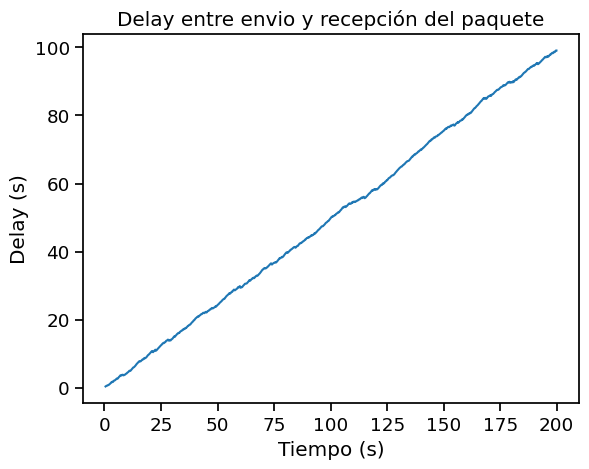

In [22]:
plt.plot(delayTime_x, delayTime_y)
plt.xlabel('Tiempo (s)')
plt.ylabel('Delay (s)')
plt.title('Delay entre envio y recepción del paquete')
plt.savefig('C1_0.1_delay.png', bbox_inches='tight')

# Delay promedio por paquete

In [23]:
print("Delay promedio (segundos) "+ str(numpy.nanmean(delayTime_y)))

Delay promedio (segundos) 49.74183448141008


# Cantidad de paquetes generados y recibidos

In [24]:
print("La cantidad de paquetes recibidos es: ", cantidadPaquetesRecibidos)
print("La cantidad de paquetes enviados es: ", cantidadPaquetesEnviados)
print("La cantidad de paquetes perdidos es: ", cantidadPaquetesDrop)


La cantidad de paquetes recibidos es:  998.0
La cantidad de paquetes enviados es:  1979
La cantidad de paquetes perdidos es:  0.0


# Cantidad de paquetes en buffers

/tmp/ipykernel_14383/1019296066.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot(3,1,1)


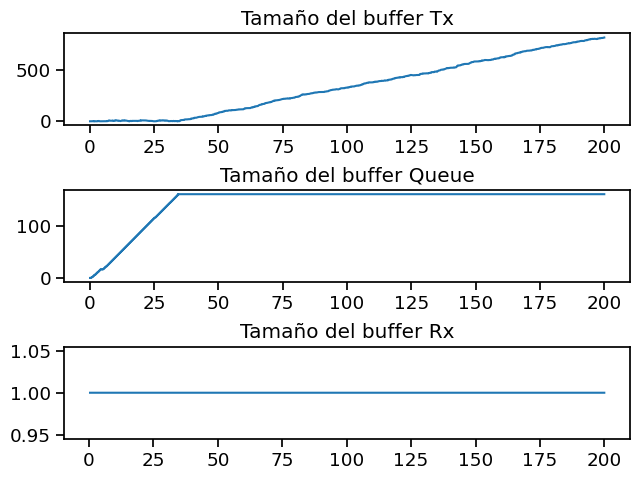

In [25]:


plt.plot(tamBufferTx_x, tamBufferTx_y, label="Tx")
plt.plot(tamBufferQueue_x, tamBufferQueue_y, label="Queue")
plt.plot(tamBufferRx_x, tamBufferRx_y, label="Rx")
plt.title("Tamaño de los buffers")
plt.legend()
plt.savefig('C1_0.1_tamBuffers1.png', bbox_inches='tight')



ax2 = plt.subplot(3,1,1)
ax2.plot(tamBufferTx_x, tamBufferTx_y)
ax2.set_title("Tamaño del buffer Tx")

ax3 = plt.subplot(3,1,2)
ax3.plot(tamBufferQueue_x, tamBufferQueue_y)
ax3.set_title("Tamaño del buffer Queue")

ax4 = plt.subplot(3,1,3)
ax4.plot(tamBufferRx_x, tamBufferRx_y)
ax4.set_title("Tamaño del buffer Rx")

plt.tight_layout(pad=0.5)

plt.savefig('C1_0.1_tamBuffers2.png', bbox_inches='tight')


# Grafico carga util

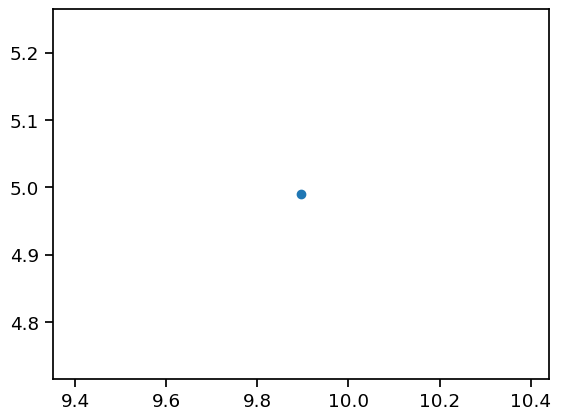

In [11]:
# Calcular la carga útil
def get_cargas(paquetes_emisor, paquetes_receptor, total_time=200)
    carga_ofrecida = sum(paquetes_emisor) / total_time
    carga_util = sum(paquetes_receptor) / total_time
    return carga_ofrecida, carga_util
    

fig, ax = plt.subplots() #creo una figura y divido en pares para dibujar

ax.scatter(*get_cargas(rx))